# Assignment 3


## Instructions

Please complete this Jupyter notebook and then convert it to a `.py` file called `assignment3.py`. Upload this file to Gradescope, and await feedback. 

You may submit as many times as you want up until the deadline. Only your latest submission counts toward your grade.

Some tests are hidden and some are visible. The outcome of the visible checks will be displayed to you immediately after you submit to Gradescope. The hidden test outcomes will be revealed after final scores are published. 

This means that an important part of any strategy is to **start early** and **lock in all the visible test points**. After that, brainstorm what the hidden checks could be and collaborate with your teammates.


### Problem 1


Recall the derivation of the posterior
\begin{align}
\pi(\theta \mid y) 
&\propto L(y \mid \theta) \pi(\theta) \\
&\propto \underbrace{ \left\{ \theta^{-n/2}\exp\left[-\frac{\sum_i y_i^2}{2\theta} \right] \right\}}_{ \propto L(y \mid \theta)} \underbrace{\theta^{-(a+1)}\exp\left[ - b/\theta \right] }_{ \propto \pi(\theta)}  \\
&= \theta^{-(a + n/2 + 1)} \exp\left[ - \frac{b  + ns/2}{\theta}\right]
\end{align}

where $\theta > 0$ and $\pi(\theta) = \text{Inverse-Gamma}(a,b)$ and

$$
L(y \mid \theta) \propto \theta^{-n/2}\exp\left[-\frac{\sum_i y_i^2}{2\theta} \right]
$$

1.

What is the natural logarithm of the normalizing constant of the final line? In other words, what do we have to divide $\theta^{-(a + n/2 + 1)} \exp\left[ - \frac{b  + ns/2}{\theta}\right]$ by so that it integrates to $1$? Then take the natural log of that. 

Stated differently, what is $\log \int_0^\infty \theta^{-(a + n/2 + 1)} \exp\left[ - \frac{b  + ns/2}{\theta}\right] \text{d} \theta$? 

Assume
 - $a = 10$
 - $b = 11$
 - $n = 42$
 - $s = 15$
 


Assign your answer to `log_norm_const`

NB1: if we didn't use the logarithm, the normalizing constant would be *way* too close to $0$.


NB2: You're not doing calculus here. Rely on the fact that every normalized density integrates to $1$.

In [1]:
from scipy.special import gammaln
import numpy as np
a = 10
b = 11
n = 42
s = 15
alpha = a+(n/2)
beta = b+n*s/2
log_norm_const = gammaln(alpha)-31*np.log(beta)
log_norm_const

np.float64(-104.73558247353778)

2. 

Are either of these dependent on the value of $\theta$? If yes, assign `True` to `dependent_on_theta`. Otherwise assign `False`

In [2]:
dependent_on_theta = False

### Problem 2


Assume the same model as the previous question except assume the mean of $y \mid \theta$ is now $\mu \neq 0$. You can continue to assume that $\mu$ is still known, it's just nonzero.

How do the derivations change? Adapt the derivations and upload a scanned copy of your work to Gradescope portal.



### Problem 3

Sometimes picking the hyperparameters of a prior can be tricky if they don't have an easy interpretation. Here is a way to pick a prior that involves simulating data. If the data simulations look like you would expect, then the prior is a reasonable choice.

Assume the same model as the question one and assume we are dealing with medium-frequency (e.g. every five seconds) stock index percentage returns scaled by $100$. Choose an inverse gamma prior by simulating from the **prior predictive distribution.** The prior predictive distribution is

$$
p(y) = \int L(y \mid \theta) \pi(\theta) \text{d}\theta.
$$


NB1: **do not look at any data before doing this!** You will all have different priors!

NB2: it might take you a few iterations of all these subquestions to find hyperparameters that you like. 

1.

First, assign your chosen $a$ and $b$ hyperparameters to `prior_a` and `prior_b`. Please restrict your attention to $a > 2$ (I'll explain why in class).

In [30]:
prior_a = 6
prior_b = 12

2.

Simulate $\theta^1, \theta^2, \ldots, \theta^{10,000}$ from the prior. Call these samples `prior_param_samples`

NB: we are using a *superscript* to denote iteration number.

In [ ]:
from scipy.stats import invgamma
prior_param_samples = invgamma.rvs(a=prior_a, scale=prior_b, size=10000)
prior_param_samples

array([1.59519936, 1.62924105, 1.94318654, ..., 1.44289054, 5.04231551,
       2.23241824])

2.

For each parameter sample, simulate $100$ stock returns from the likelihood. Arrange your simulations as one super long numpy array. Call it `prior_predic_samps`.

NB: For parameter sample $i$, you have 

$$
y_1, \ldots, y_{100} \mid \theta^i \sim \text{Normal}(0, \theta^i)
$$

NB2: Each $\theta^i$ is the **variance** not the standard deviation.

In [51]:
from scipy.stats import norm
prior_predic_samps = []
num_sims = 100
for theta in prior_param_samples:
    prior_predic_samps.append(np.random.normal(0, np.sqrt(theta), num_sims))
prior_predic_samps = np.array(prior_predic_samps).flatten()

3.

Make a histogram of all your data samples. Upload a `.pdf` or a `.png` to Gradescope. Remember, this picture has to agree with your intuition about what stock returns could look like. Otherwise, your prior hyperparameters aren't a good choice!

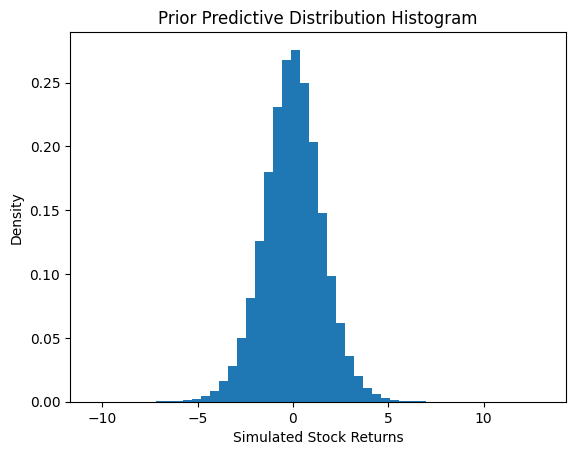

In [52]:
import matplotlib.pyplot as plt
plt.hist(prior_predic_samps, bins = 50, density=True)
plt.xlabel('Simulated Stock Returns')
plt.ylabel('Density')
plt.title('Prior Predictive Distribution Histogram')
plt.savefig('prior_predictive_distribution.png')

4.

What is the difference between a prior predictive distribution and a posterior predictive distribution? What do they have in common? Upload your free response to Gradescope.

### Problem 4


Recall the derivation of the posterior
$$
\theta \mid y_1, \ldots, y_n \sim \text{Normal}\left( \bar{x}\left(\frac{\frac{n}{1}}{\frac{1}{b} + \frac{n}{1}} \right) + a\left(\frac{\frac{1}{b}}{\frac{1}{b} + \frac{n}{1}} \right) ,\frac{1}{\frac{1}{b} + \frac{n}{1} } \right)
$$

where $\theta$ is the mean parameter, $\pi(\theta) = \text{Normal}(a,b)$ and 


The work was 
$$
L(y \mid \theta) \propto \exp\left[-\frac{\sum_i (y_i-\theta)^2}{2} \right]
$$

\begin{align}
\pi(\theta \mid y) 
&\propto L(y \mid \theta) \pi(\theta) \\
&\propto \exp\left[ -\frac{1}{2} \frac{\left(\theta - \text{post. mean} \right)^2}{ \text{post. var.}} \right]
\end{align}


1.

What is the natural logarithm of the normalizing constant of the final line? In other words, what do we have to divide $\exp\left[ -\frac{1}{2} \frac{\left(\theta - \text{post. mean} \right)^2}{ \text{post. var.}} \right]$ by so that it integrates to $1$? Then take the natural log of that. 

Stated differently, what is $\log \int_{-\infty}^\infty \exp\left[ -\frac{1}{2} \frac{\left(\theta - \text{post. mean} \right)^2}{ \text{post. var.}} \right]\text{d} \theta$? 


Assign your answer to `log_norm_const2`

NB: You're not doing calculus here. Rely on the fact that every normalized density integrates to $1$.


Assume
 - $a = 10$
 - $b = 11$
 - $n = 42$
 - $\bar{x} = 15$



In [8]:
a = 10
b = 11
n = 42
x_bar = 15
post_mean = x_bar * ((n/1)/((1/b) + (n/1))) + a * ((1/b)/((1/b) + (n/1)))
post_var = 1 / ((1/b) + (n/1))
log_norm_const2 = np.log(np.sqrt(2*np.pi*post_var))
log_norm_const2

np.float64(-0.950977357439259)

### Problem 5


Assume the same model as the previous question except assume the variance of $y \mid \theta$ is now $\sigma^2 \neq 1$. How do the derivations change? Adapt the derivations and upload a scanned copy of your work to Gradescope portal.



### Problem 6

We will return to the model described in question one. Specifically, we will assume our data are normally distributed with mean $0$, and that we're only uncertain about the variance parameter. We will also use the prior hyperparameters we chose in an earlier problem!

Our data set will be intraday stock returns. 

1.

Download and read in the data set `SPY-STK.csv`. Ignore every column except `bid_price_close` and `time`. These are prices of the S\&P 500 exchange traded fund recorded on March 26, 2024. Call your data set `stock_data` and store it as a `pandas` `DataFrame`. 


In [17]:
import pandas as pd
stock_data= pd.read_csv('SPY-STK.csv')
stock_data = stock_data[['time', 'bid_price_close']]
stock_data

,time,bid_price_close
0,2024-03-26T09:22:05,520.81
1,2024-03-26T09:22:10,520.82
2,2024-03-26T09:22:15,520.80
3,2024-03-26T09:22:20,520.81
4,2024-03-26T09:22:25,520.83
...,...,...
5011,2024-03-26T16:19:40,519.35
5012,2024-03-26T16:19:45,519.35
5013,2024-03-26T16:19:50,519.32
5014,2024-03-26T16:19:55,519.32


2.

Calculate percent returns and make sure to scale them by $100$. Store them in a `pandas` `Series` called `one_day_returns`.

In [ ]:
one_day_returns = stock_data['bid_price_close'].pct_change().dropna()*100
one_day_returns

1       0.001920
2      -0.003840
3       0.001920
4       0.003840
5       0.001920
          ...   
5011    0.000000
5012    0.000000
5013   -0.005776
5014    0.000000
5015    0.000000
Name: bid_price_close, Length: 5015, dtype: float64

3.

Assign your Inverse Gamma posterior hyperparameters to `posterior_a` and `posterior_b`. Then create an `scipy.stats.invgamma` for your posterior. Give it the right hyperparameters and call it `posterior` 

In [22]:
a = prior_a
b = prior_b
n = len(one_day_returns)
#x_bar = one_day_returns.mean()
s=one_day_returns.var()
#posterior_a = x_bar * ((n/1)/((1/b) + (n/1))) + a * ((1/b)/((1/b) + (n/1)))
#posterior_b = 1 / ((1/b) + (n/1))
posterior_a = prior_a + n / 2
posterior_b = prior_b + n*s/2
posterior = invgamma(posterior_a, posterior_b)

4. 


Sample 10,000 single returns from the posterior predictive distribution. Make it a `numpy` array and call it `post_pred_samps`.

In [23]:
numsims = 10000
posterior_params = posterior.rvs(numsims)
post_pred_samps = [norm(0, theta).rvs(1)[0] for theta in posterior_params]
post_pred_samps

[np.float64(-3.2963761933619176),
 np.float64(10.960857435507226),
 np.float64(2.8783673740414675),
 np.float64(-0.7537472018003536),
 np.float64(-19.02465487521613),
 np.float64(-1.859453012369873),
 np.float64(2.1185094126850443),
 np.float64(13.065566649447446),
 np.float64(4.700667864811908),
 np.float64(-1.0304974812922967),
 np.float64(-11.393242336633461),
 np.float64(12.472134789235843),
 np.float64(-2.9258743491143884),
 np.float64(-5.354305728486958),
 np.float64(-18.31573565720105),
 np.float64(1.0487138477067273),
 np.float64(0.5772968814553231),
 np.float64(-2.5305258096025147),
 np.float64(0.538625102035113),
 np.float64(-7.603925749304649),
 np.float64(-11.014391965353125),
 np.float64(-7.7501977678507155),
 np.float64(-1.9870955232335898),
 np.float64(-10.149212851976749),
 np.float64(-8.431351726731865),
 np.float64(-5.566618994967995),
 np.float64(2.563136471785278),
 np.float64(-5.148279119155714),
 np.float64(-9.96789818095094),
 np.float64(7.404154812992651),
 np.f

5. 


Use the posterior predictive samples and create two plots to show whether this model represents reality well. Use a histogram and a time series plot. 

Do the histograms look similar? Do the time-ordered observations look similar. What are the strengths and weaknesses of this model?

What you are doing now is called a **posterior predictive check**. 

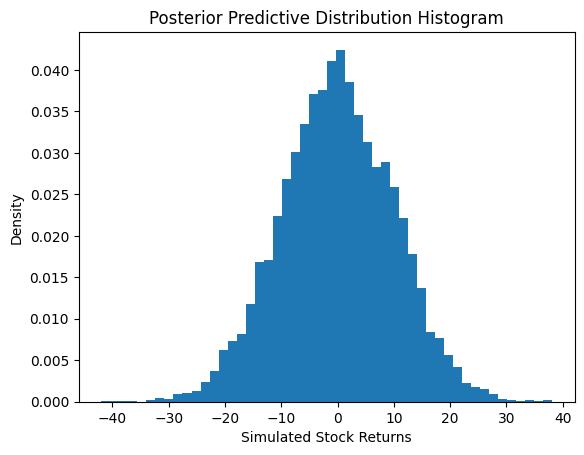

In [41]:
plt.hist(post_pred_samps, bins = 50, density=True)
plt.xlabel('Simulated Stock Returns')
plt.ylabel('Density')
plt.title('Posterior Predictive Distribution Histogram')
plt.savefig('posterior_predictive_distribution.png')

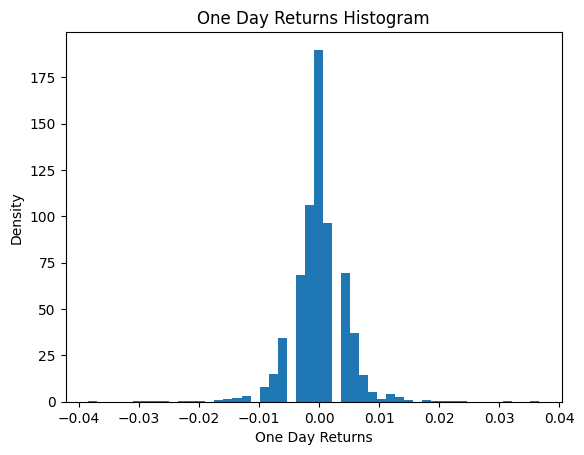

In [42]:
one_day_returns_full = stock_data['bid_price_close'].pct_change()*100
plt.hist(one_day_returns, bins=50, density=True)
plt.xlabel('One Day Returns')
plt.ylabel('Density')    
plt.title('One Day Returns Histogram')
plt.savefig('one_day_returns_histogram.png')

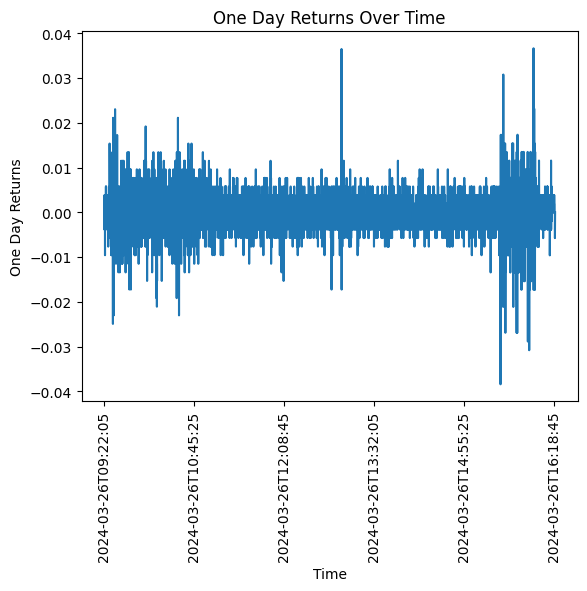

In [47]:
plt.plot(stock_data['time'], one_day_returns_full,)
plt.xlabel('Time')
plt.xticks([0, 1000, 2000, 3000, 4000, 5000], rotation=90)
plt.ylabel('One Day Returns')
plt.title('One Day Returns Over Time')
plt.savefig('one_day_returns_over_time.png')

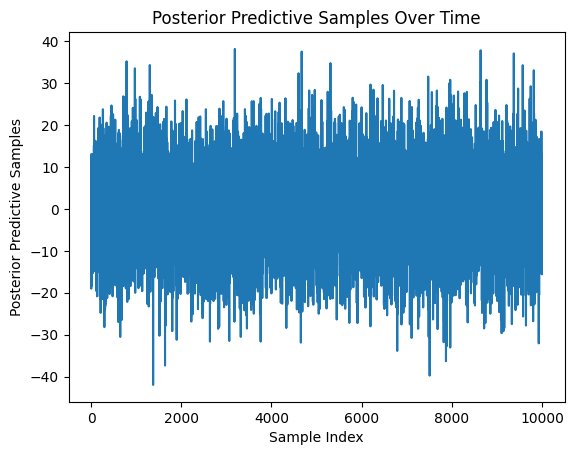

In [44]:
plt.plot(post_pred_samps)
plt.xlabel('Sample Index')
plt.ylabel('Posterior Predictive Samples')
plt.title('Posterior Predictive Samples Over Time')
plt.savefig('posterior_predictive_samples_over_time.png')